# Assignment No. 3

## Part 2 - Practice the usage of CNN
Using CNNs to identify the type of a flower that appears in an image.

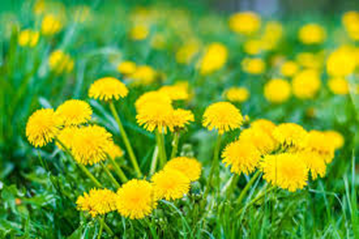

# *YOLOv5*

In [1]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
!tar -xzf 102flowers.tgz;

--2023-07-22 21:34:43--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz [following]
--2023-07-22 21:34:43--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  31.3MB/s    in 11s     

2023-07-22 21:34:55 (29.2 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2023-07-22 21:34:55--  https://www.robots.ox.ac.uk/~vgg/data/flowe

In [3]:
!pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.3/953.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.6/606.6 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 16.4 MB/s eta

In [4]:
import os
import scipy.io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.transform import resize
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.applications.densenet import DenseNet201

In [5]:
import os

def create_directory(dir_name):
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)

In [6]:
import shutil

def populate_directory(source_dir, target_base, file_type, filenames, labels):
    for filename in filenames:
        index = int((filename.split('.')[0]).split('_')[-1]) - 1
        target_dir = target_base + '/' + file_type + '/' + str(labels[index])
        create_directory(target_dir)
        shutil.copy(source_dir + '/' + filename, target_dir + '/' + filename)

In [7]:
import scipy.io
from sklearn.model_selection import train_test_split

source_dir = 'jpg'
NUM_OF_OPERATIONS = 2

mat = scipy.io.loadmat('imagelabels.mat')
images_files = os.listdir(source_dir)
labels = mat['labels'][0].tolist()
print(images_files)
print(labels)

for i in range(NUM_OF_OPERATIONS):
  shutil.rmtree(f'data{i}', ignore_errors=True)
  os.mkdir(f'data{i}')
  os.mkdir(f'data{i}/train')
  os.mkdir(f'data{i}/valid')
  os.mkdir(f'data{i}/test')

  x_train,x_valid_test = train_test_split(images_files, test_size = 0.5)
  x_valid, x_test = train_test_split(x_valid_test ,test_size = 0.5)

  populate_directory(source_dir, f'data{i}', 'train', x_train, labels)
  populate_directory(source_dir, f'data{i}', 'valid', x_valid, labels)
  populate_directory(source_dir, f'data{i}', 'test', x_test, labels)

['image_07258.jpg', 'image_06937.jpg', 'image_02434.jpg', 'image_05039.jpg', 'image_00030.jpg', 'image_06660.jpg', 'image_00820.jpg', 'image_06341.jpg', 'image_01919.jpg', 'image_01382.jpg', 'image_01993.jpg', 'image_01609.jpg', 'image_01369.jpg', 'image_01582.jpg', 'image_02181.jpg', 'image_00038.jpg', 'image_01103.jpg', 'image_07511.jpg', 'image_01531.jpg', 'image_03530.jpg', 'image_01990.jpg', 'image_01573.jpg', 'image_00550.jpg', 'image_01656.jpg', 'image_06614.jpg', 'image_00905.jpg', 'image_04115.jpg', 'image_07056.jpg', 'image_00282.jpg', 'image_08031.jpg', 'image_07857.jpg', 'image_05323.jpg', 'image_02151.jpg', 'image_07928.jpg', 'image_01301.jpg', 'image_05657.jpg', 'image_03817.jpg', 'image_08099.jpg', 'image_07500.jpg', 'image_05867.jpg', 'image_04169.jpg', 'image_03091.jpg', 'image_00182.jpg', 'image_06157.jpg', 'image_06697.jpg', 'image_02285.jpg', 'image_02129.jpg', 'image_04949.jpg', 'image_02196.jpg', 'image_00515.jpg', 'image_00508.jpg', 'image_07993.jpg', 'image_0658

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating more train and test data
img_data_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_data_generator = ImageDataGenerator( rescale = 1./255. )

In [9]:
batch_size = 32
num_classes = 102
image_width = 256
image_height = 256

vgg19_data0_accuracy = []
vgg19_data0_loss = []
vgg19_data1_accuracy = []
vgg19_data1_loss = []

densenet_data0_accuracy = []
densenet_data0_loss = []
densenet_data1_accuracy = []
densenet_data1_loss = []

In [10]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history, test_accuracy, test_loss):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.plot(epochs, test_accuracy, label='Test acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.grid(True)
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19

def build_model(base_model, num_classes=102):
    tf.keras.backend.clear_session()

    for layer in base_model.layers:
        layer.trainable=False

    model = tf.keras.models.Sequential([base_model,
                                        tf.keras.layers.GlobalAveragePooling2D(),
                                        Flatten(),
                                        Dense(512,activation="relu"),
                                        Dense(num_classes, activation='softmax')
                                ])

    # model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['acc'])
    return model

In [12]:
from tensorflow.keras.callbacks import Callback

class TestCallback(Callback):
    def __init__(self, test_data_generator, accuracy, loss):
        self.test_data_generator = test_data_generator
        self.accuracy = accuracy
        self.loss = loss

    def on_epoch_end(self, epoch, logs={}):
        print(f'Testing epoch #{epoch+1}')
        loss, accuracy = self.model.evaluate(self.test_data_generator, verbose=1)
        self.loss.append(loss)
        self.accuracy.append(accuracy)

In [13]:
def train_model(base_folder, base_model, data_generator, test_data_generator, accuracy, loss):
    train_data = data_generator.flow_from_directory(f'{base_folder}/train',
                                                      target_size=(256, 256),
                                                      class_mode='categorical',
                                                      batch_size=32,
                                                      shuffle=True)
    print(train_data.class_indices)

    valid_data = data_generator.flow_from_directory(f'{base_folder}/valid',
                                                      target_size=(256, 256),
                                                      class_mode='categorical',
                                                      batch_size=32,
                                                      shuffle=True)

    predict_generator =  test_data_generator.flow_from_directory(f'{base_folder}/test',
                                                      batch_size=128,
                                                      class_mode='categorical',
                                                      shuffle=False,
                                                      target_size=(256, 256))

    model = build_model(base_model)
    history = model.fit(train_data, validation_data=valid_data, epochs=25, steps_per_epoch=40, callbacks=[TestCallback(predict_generator, accuracy, loss)])
    return history

In [17]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15814 (delta 10), reused 25 (delta 2), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (10819/10819), done.


In [23]:
import os

os.chdir('/content/yolov5')

In [24]:
!pip install -U -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling reque

In [26]:
!pip uninstall -y Pillow

Found existing installation: Pillow 10.0.0
Uninstalling Pillow-10.0.0:
  Successfully uninstalled Pillow-10.0.0


In [27]:
!pip install Pillow==8.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-8.3.1-cp310-cp310-linux_x86_64.whl size=1164658 sha256=87a71f2252bb7467e2d7ce175edb283e40af91a733aae340f7aef804115cbab5
  Stored in directory: /root/.cache/pip/wheels/cd/7a/8b/74d32af196cbd3642790ed3a7d2c19c3afd665312194503334
Successfully built Pillow
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.25.1 requires pillow>=8.3.2, but you have pillow 8.3.1 which is incompatible.
torchvision 0.15.2+cu118 requires pillow!=8.3.*,>=5.3.0, but you have pillow 8.3.1 which is incompatible.


In [28]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

YOLOv5 🚀 2023-7-22 Python-3.10.6 torch-2.0.1+cu118 CPU



[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/METADATA'


100%|██████████| 14.1M/14.1M [00:00<00:00, 103MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import vgg19

In [32]:
!pip install torch torchvision

  Using cached Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.3.1
    Uninstalling Pillow-8.3.1:
      Successfully uninstalled Pillow-8.3.1


In [33]:
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-22 Python-3.10.6 torch-2.0.1+cu118 CPU



[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/numpy-1.22.4.dist-info/METADATA'


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [55]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader

def train_model(data_dir, model, batch_size, epochs):
    # Assuming you have the data in the 'data0' directory, you can train the model as follows:
    train_data_dir = os.path.join(data_dir, 'train')
    val_data_dir = os.path.join(data_dir, 'val')

    # Assuming you have already defined the necessary data transformations and datasets (img_data_generator and test_data_generator).

    # Assuming you have defined the number of classes (num_classes).

    # Replace the loss function with the appropriate YOLOv5 loss function.
    criterion = nn.CrossEntropyLoss()

    # Replace the optimizer with the appropriate YOLOv5 optimizer (e.g., AdamW).
    optimizer = optim.AdamW(model.parameters(), lr=0.001)

    # Assuming you have defined the training and validation data loaders for the YOLOv5 model.
    train_loader = DataLoader(img_data_generator, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(test_data_generator, batch_size=batch_size, shuffle=False)

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, targets in train_loader:
            # Move inputs and targets to the GPU if available
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Compute the loss
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute the accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

            # Print statistics
            running_loss += loss.item()

        # Print training accuracy and loss for each epoch
        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}: Training accuracy = {train_accuracy:.4f}, Training loss = {running_loss/len(train_loader):.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, targets in val_loader:
                # Move inputs and targets to the GPU if available
                inputs = inputs.to(device)
                targets = targets.to(device)

                # Forward pass
                outputs = model(inputs)

                # Compute the loss
                loss = criterion(outputs, targets)

                # Compute the accuracy
                _, predicted = torch.max(outputs.data, 1)
                val_total += targets.size(0)
                val_correct += (predicted == targets).sum().item()

                # Accumulate validation loss
                val_loss += loss.item()

        # Print validation accuracy and loss for each epoch
        val_accuracy = 100 * val_correct / val_total
        print(f"Epoch {epoch+1}/{epochs}: Validation accuracy = {val_accuracy:.4f}, Validation loss = {val_loss/len(val_loader):.4f}")

    print('Finished Training')

    return model

In [56]:
yolov5_data0_history = train_model('/content/data0', yolov5_model, batch_size=32, epochs=25)

plot_accuracy_loss(yolov5_data0_history)

TypeError: ignored

In [57]:
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the YOLOv5 model (you need to have yolov5 installed)
yolov5_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Function to load and preprocess images for YOLOv5
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (256, 256))  # Adjust the size as needed
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Function to load the dataset
def load_dataset(data_dir, batch_size=32):
    # Use the appropriate YOLOv5 data loaders for your dataset
    # For example, if your dataset is in the form of image files, you can use ImageDataGenerator or tf.data.Dataset to load the data.

    # Replace the following code with your own data loading logic using YOLOv5 data loaders.
    # For this example, we assume you have a data directory containing subdirectories for each class.
    data_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=load_and_preprocess_image)
    train_data = data_generator.flow_from_directory(data_dir+'/train', target_size=(256, 256), batch_size=batch_size, class_mode='categorical')
    valid_data = data_generator.flow_from_directory(data_dir+'/valid', target_size=(256, 256), batch_size=batch_size, class_mode='categorical')
    test_data = data_generator.flow_from_directory(data_dir+'/test', target_size=(256, 256), batch_size=batch_size, class_mode='categorical')

    return train_data, valid_data, test_data

# Function to train the model
def train_model(data_dir, model, batch_size=32, epochs=25):
    train_data, valid_data, test_data = load_dataset(data_dir, batch_size=batch_size)

    # Replace the loss and optimizer with appropriate YOLOv5 loss and optimizer
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data, validation_data=valid_data, epochs=epochs, steps_per_epoch=len(train_data), validation_steps=len(valid_data))

    return history

# Function to plot accuracy and loss
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.grid(True)
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

num_classes = 10

data_dir = '/content/data0'
yolov5_data0_history = train_model(data_dir, yolov5_model, batch_size=32, epochs=25)

plot_accuracy_loss(yolov5_data0_history)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-22 Python-3.10.6 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Found 4094 images belonging to 102 classes.
Found 2047 images belonging to 102 classes.
Found 2048 images belonging to 102 classes.


AttributeError: ignored